# 1. Introduction

This project will answer the question: Do Apple Store apps receive better reviews than Google Play apps?

# 2. Sourcing and Loading
## 2a. Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

### 2b. Load the data

In [4]:
google = 'googleplaystore.csv'

Google = pd.read_csv(google)

Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [6]:
apple = 'AppleStore.csv'

Apple = pd.read_csv(apple)

Apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


### 2c. Subset data

I will select only those columns that we want to work with from both datasets. I'll overwrite the subsets in the original variables.

In [7]:
# Subset our DataFrame object Google by selecting just the variables ['Category', 'Rating', 'Reviews', 'Price']
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]

# Check the first three entries
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [8]:
# Do the same with our Apple object, selecting just the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

# Let's check the first three entries
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


## 3. Data Wrangling

### 3a. Check data types

I will determine whether the variables we selected in the previous section belong to the types they should do, or whether there are any errors here. 

In [9]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [10]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

The data type for the column 'Price' is 'object', not a numeric data type like a float or an integer. I will investigate the unique values of this column. 

In [11]:
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

There are actually two issues here. 

- Firstly, there's a price called `Everyone`. That is a massive mistake.
- Secondly, there are dollar symbols everywhere.


I will address the first issue first. First, I'll check the datapoints that have the price value `Everyone`

In [17]:
Google[Google['Price'] == 'Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


Thankfully, it's just one row. I will get rid of it. 

In [20]:
Google = Google[Google['Price'] != 'Everyone']

Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Our second problem remains. This is a problem because Python actually considers these values strings. So we can't do mathematical and statistical operations on them until we've made them into numbers. 

In [22]:
nosymb = Google['Price'].str.replace('$', '')

Google['Price'] = pd.to_numeric(nosymb)

I will verify that the 'Price' column really is numeric now.

In [23]:
# Use the function dtypes. 
Google['Price'].dtypes

dtype('float64')

The column `Reviews` is still an object column. We actually need this column to be a numeric column, too. 

In [24]:
# Convert the 'Reviews' column to a numeric data type. 
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [25]:
# Let's check the data types of Google again
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

### 3b. Add a `platform` column to both the `Apple` and the `Google` dataframes
I will add a new column to both dataframe objects called `platform`: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'. 

I will ultimately join our Apple and Google data together, and actually test out some hypotheses to solve our initial problem.

In [28]:
Apple['platform'] = 'apple'
Google['platform'] = 'google'

### 3c. Changing the column names to prepare for our join of the two datasets 
Since the easiest way to join two datasets is if they have both:
- the same number of columns
- the same column names
we need to rename the columns of `Apple` so that they're the same as the ones of `Google`, or vice versa.

In this case, we're going to change the `Apple` columns names to the names of the `Google` columns. 

In [40]:
old_names = Apple.columns

new_names = Google.columns

Apple.rename(columns=dict(zip(old_names, new_names)), inplace=True)

Index(['Category', 'Rating', 'Reviews', 'Price', 'platform'], dtype='object')

### 3d. Join the two datasets 

In [70]:
df = Google.append(Apple)

df.sample(12)

,Category,Rating,Reviews,Price,platform
4253,HEALTH_AND_FITNESS,2.3,74,0.0,google
6971,GAME,4.3,85882,0.0,google
3525,PRODUCTIVITY,4.2,226456,0.0,google
685,DATING,4.8,125,0.0,google
181,BOOKS_AND_REFERENCE,4.4,8788,0.0,google
6021,FAMILY,3.3,16,0.0,google
1660,GAME,4.6,23133508,0.0,google
1183,FOOD_AND_DRINK,4.7,611136,0.0,google
9249,TOOLS,NaN,0,0.0,google
5165,MEDICAL,NaN,0,0.0,google


### 3e. Eliminate the NaN values

I will eliminate all the `NaN` values from the table.

In [71]:
df.dropna(inplace=True)

df.shape

(16563, 5)

### 3f. Filter the data so that we only see whose apps that have been reviewed at least once

Apps that haven't been reviewed yet can't help us solve our brief. 

In [72]:
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

929 apps do not have reviews, we need to eliminate these points

In [73]:
df = df[df['Reviews'] != 0]

# 3. Exploratory Data Analysis

## 3a. Summarize the data visually and analytically (by the column `platform`)

What we need to solve our brief is a summary of the `Rating` column, but separated by the different platforms.

In [131]:
df.groupby('platform').Rating.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


The means of 4.049697 and 4.191757 don't **seem** all that different! 

**Outline of my method:**
1. I'll assume that platform (i.e, whether the app was Google or Apple) really doesn’t impact ratings. 


2. Given this assumption, we should actually be able to get a difference in mean rating for Apple apps and mean rating for Google apps that's pretty similar to the one we actually got (0.14206) just by: 
a. shuffling the ratings column, 
b. keeping the platform column the same,
c. calculating the difference between the mean rating for Apple and the mean rating for Google. 


3. We can make the shuffle more useful by doing it many times, each time calculating the mean rating for Apple apps and the mean rating for Google apps, and the difference between these means. 


4. We can then take the mean of all these differences, and this will be called our permutation difference. This permutation difference will be great indicator of what the difference would be if our initial assumption were true and platform really doesn’t impact on ratings. 


5. Now we do a comparison. If the observed difference looks just like the permutation difference, then we stick with the claim that actually, platform doesn’t impact on ratings. If instead, however, the permutation difference differs significantly from the observed difference, we'll conclude: something's going on; the platform does in fact impact on ratings. 

Let's get a **visual summary** of the `Rating` column, separated by the different platforms. 

A good tool to use here is the boxplot.

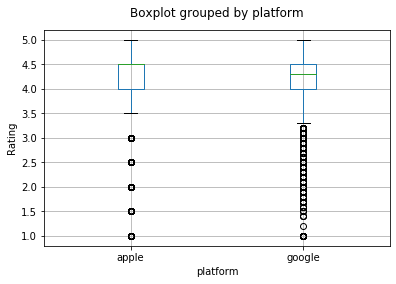

In [100]:
# Call the boxplot() method on our df.
_ = df.boxplot(column='Rating', by='platform')
_ = plt.title('')
_ = plt.ylabel('Rating')

Here we see the same information as in the analytical summary, but with a boxplot.

# 4. Modeling

### 4a. Hypothesis formulation

Our hypotheses are:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).

**H<sub>alternative</sub>**: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform)

We're also going to pick a **significance level** of 0.05. 

### 4b. Getting the distribution of the data
Now that the hypotheses and significance level are defined, we can select a statistical test to determine which hypothesis to accept. 

In [110]:
apple = df[df['platform'] == 'apple']['Rating']
google = df[df['platform'] == 'google']['Rating']

In [111]:
apple_normal = stats.normaltest(apple)
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [112]:
google_normal = stats.normaltest(google)
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal. 

Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed. 

We can actually also check out the distribution of the data visually with a histogram.

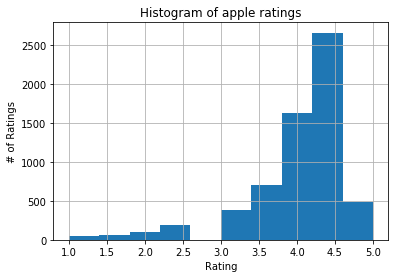

In [114]:
_ = apple.hist()
_ = plt.xlabel('Rating')
_ = plt.ylabel('# of Ratings')
_ = plt.title('Histogram of apple ratings')

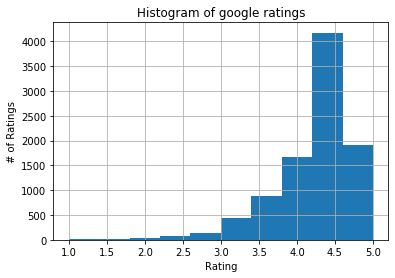

In [115]:
_ = google.hist()
_ = plt.xlabel('Rating')
_ = plt.ylabel('# of Ratings')
_ = plt.title('Histogram of google ratings')

### 4c. Permutation test
Since the data aren't normally distributed, we're using a *non-parametric* test here. 

In [148]:
df['Permutation1'] = np.random.permutation(df.Rating)

df.groupby('platform').Permutation1.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.141289,0.609595,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.130461,0.615184,1.0,4.0,4.3,4.5,5.0


In [145]:
df.groupby('platform').Rating.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [160]:
difference = []

for i in range(10000):
    df['Permutation2'] = np.random.permutation(df.Rating)
    apple_perm_mean = df.groupby('platform').Permutation2.describe()['mean']['apple']
    google_perm_mean = df.groupby('platform').Permutation2.describe()['mean']['google']
    difference.append(apple_perm_mean - google_perm_mean)

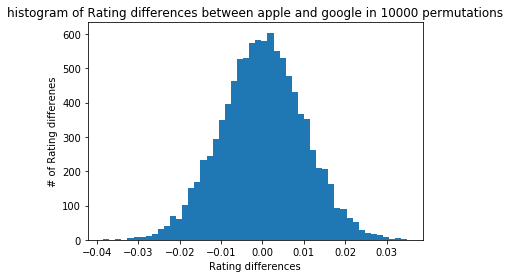

In [164]:
histo = plt.hist(difference, bins=50)
histo = plt.xlabel('Rating differences')
histo = plt.ylabel('# of Rating differenes')
histo = plt.title('histogram of Rating differences between apple and google in 10000 permutations')

In [165]:
obs_difference = np.mean(apple) - np.mean(google)

obs_difference = abs(obs_difference)

print(obs_difference)

0.14206054745123442


# 5. Evaluating and concluding

So actually, zero differences are at least as extreme as our observed difference!

So the p-value of our observed data is 0. 

It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the Null.

We conclude that platform does impact on ratings. Specifically, we should advise our client to integrate **only Google Play** into their operating system interface. 